In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
df = pd.read_csv("roster__2018-03.csv")

In [25]:
df = df[df["race"].notnull()]
df = df[["race","rank_no","gender"]]
df = df[df["rank_no"] !="UNK"]
df["rank_no"] = pd.to_numeric(df["rank_no"]) 

In [26]:
df["rank_cat"] = pd.qcut(df["rank_no"],10,duplicates="drop",labels=False)
df_new = df[df["rank_cat"] == 4] 

In [27]:
_of_Complainantsdf_group_race = df_new.groupby(["race","rank_cat"]).count()["gender"]
count1 = np.array(df_group_race)

NameError: name 'df_group_race' is not defined

In [28]:
nu = ["ASIAN","BLACK","HISPANIC","NATIVE","WHITE"]
# Showing the number of high ranked officer from each race

plt.bar(nu,count1)

NameError: name 'count1' is not defined

<BarContainer object of 5 artists>

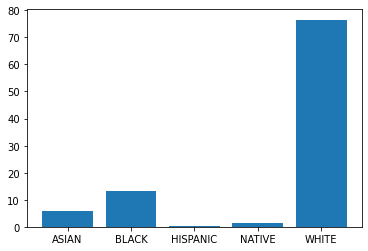

In [29]:
# biasness in the number of police officer more white then black
# 249.96 white Black 43.73 native american 4.15 asian 19.13 hispanic 0.79 8.92.
total = 249.96+43.73+4.15+19.13+0.79+8.92
white = 249.96/total*100
black = 43.73/total*100
native = 4.15/total*100
asian = 19.13/total*100
hispanic = 0.79/total*100

# the population percentage of usa by each race
plt.bar(nu,[asian,black,hispanic,native,white])

<BarContainer object of 5 artists>

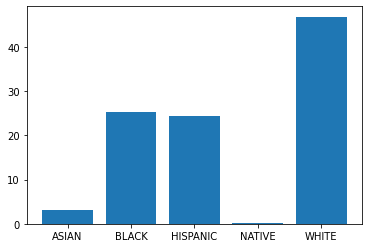

In [30]:
df_group_race = df.groupby(["race"]).count()/df["race"].count()*100
percentage_of_race_in_police = df_group_race["rank_no"]

# the percentage of police men by each race
plt.bar(nu,percentage_of_race_in_police)

In [31]:
df_group_gender = df.groupby("gender").count()/df["gender"].count()*100

In [32]:
#  161.66 million males and 166.58 million females

In [33]:
female_per = 51
male_per = 49

In [34]:
percentage_police_by_gender = df_group_gender["race"]

In [35]:
nu1 = ["Female","Male"]

<BarContainer object of 2 artists>

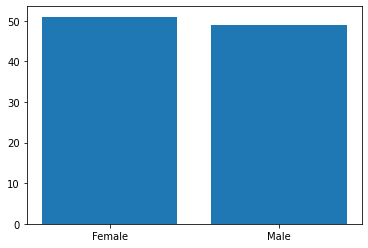

In [36]:
plt.bar(nu1,[female_per,male_per])

In [37]:
# Number of police officer by gender

<BarContainer object of 2 artists>

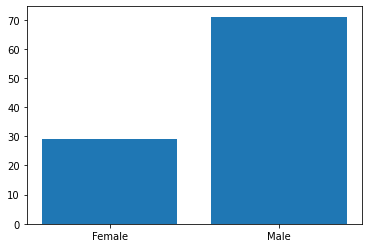

In [38]:
plt.bar(nu1,percentage_police_by_gender)

<BarContainer object of 2 artists>

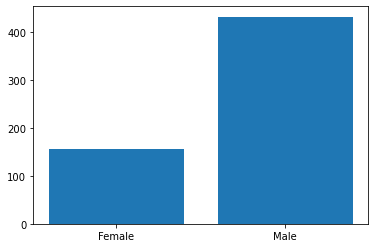

In [39]:
df_group_race = df_new.groupby(["gender","rank_cat"]).count()["race"]
count2 = np.array(df_group_race)

# percentage of high ranked officer by gender
plt.bar(nu1,count2)

In [40]:
# gender biasness

In [41]:
df_other = pd.read_csv("data.csv")
df_other = df_other[["Current_Status","Finding_Code","Is_Police_Shooting","Race","Gender"]]
df_other.dropna(inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
df_other["first_p"]=df_other["Race"].str.split("|")
df_other["first_p"] = df_other["first_p"].str[0]
df_other["first_p"] = df_other["first_p"].str.strip(" ")
columns = ["Black or African American","Hispanic","Asian or Pacific Islander","White","American Indian or Alaska Native"]
df_other1 = df_other[df_other["first_p"].isin(columns)]

In [43]:
df_other1["first_p"].unique()

array(['Black or African American', 'Asian or Pacific Islander', 'White',
       'American Indian or Alaska Native'], dtype=object)

In [44]:
df_other1["Finding_Code"]=df_other1["Finding_Code"].str.split("|")
df_other1["Finding_Code"] = df_other1["Finding_Code"].str[0]
df_other1["Finding_Code"] = df_other1["Finding_Code"].str.strip(" ")
count_of_total_cases_race = df_other1.groupby("first_p").count()["Current_Status"]
df_exonerated = df_other1[df_other1["Finding_Code"] == "Exonerated"]

<ipython-input-44-da837c6e3dee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other1["Finding_Code"]=df_other1["Finding_Code"].str.split("|")
<ipython-input-44-da837c6e3dee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other1["Finding_Code"] = df_other1["Finding_Code"].str[0]
<ipython-input-44-da837c6e3dee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [45]:

count_of_total_exonerated_race = df_exonerated.groupby(["first_p","Finding_Code"]).count()["Current_Status"]
count_of_total_exonerated_race["American Indian or Alaska Native"] = 0

In [46]:
count_of_total_exonerated_race

first_p                           Finding_Code
Asian or Pacific Islander         Exonerated        1
Black or African American         Exonerated      195
White                             Exonerated       15
American Indian or Alaska Native                    0
Name: Current_Status, dtype: int64

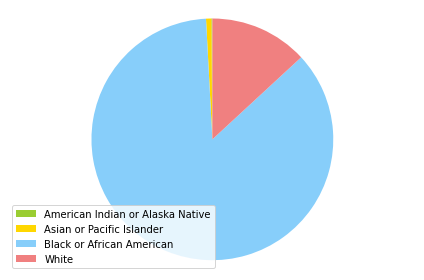

In [47]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(count_of_total_cases_race, colors=colors, startangle=90)
plt.legend(patches, count_of_total_cases_race.index, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

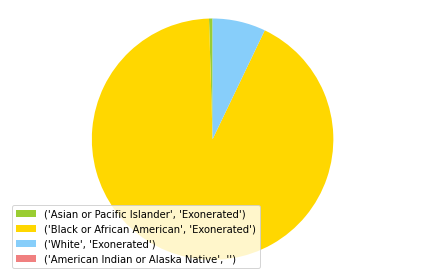

In [48]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(count_of_total_exonerated_race, colors=colors, startangle=90)
plt.legend(patches, count_of_total_exonerated_race.index, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

In [49]:
df_other["gend"]=df_other["Gender"].str.split("|")
df_other["gend"] = df_other["gend"].str[0]
df_other["gend"] = df_other["gend"].str.strip(" ")
columns = ["Male","Female"]
df_other2 = df_other[df_other["gend"].isin(columns)]

In [50]:
df_other2["Finding_Code"]=df_other2["Finding_Code"].str.split("|")
df_other2["Finding_Code"] = df_other2["Finding_Code"].str[0]
df_other2["Finding_Code"] = df_other2["Finding_Code"].str.strip(" ")
count_of_total_cases_gender = df_other2.groupby("gend").count()["Current_Status"]
df_exonerated = df_other2[df_other2["Finding_Code"] == "Exonerated"]

<ipython-input-50-c5a8453dc101>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other2["Finding_Code"]=df_other2["Finding_Code"].str.split("|")
<ipython-input-50-c5a8453dc101>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other2["Finding_Code"] = df_other2["Finding_Code"].str[0]
<ipython-input-50-c5a8453dc101>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [51]:
count_of_total_cases_gender

gend
Female     5666
Male      16964
Name: Current_Status, dtype: int64

In [52]:
count_of_total_exonerated_gender = df_exonerated.groupby(["gend","Finding_Code"]).count()["Current_Status"]


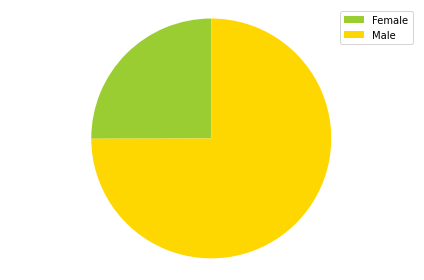

In [53]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(count_of_total_cases_gender, colors=colors, startangle=90)
plt.legend(patches, count_of_total_cases_gender.index, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

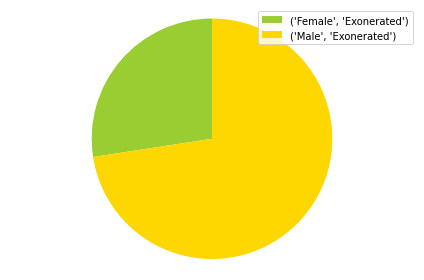

In [54]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(count_of_total_exonerated_gender, colors=colors, startangle=90)
plt.legend(patches, count_of_total_exonerated_gender.index, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()